In [1]:
!pip install tensorflow

In [3]:
!pip install scipy
!pip install pynrrd

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import pandas as pd
import SimpleITK as sitk
from matplotlib import pyplot as plt
from scipy import ndimage
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
import math
from skimage.filters import threshold_mean
import cv2

C:\Users\clarynse\AppData\Local\Temp\ipykernel_22872\1494234353.py:8: DeprecationWarning: Please import `map_coordinates` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import map_coordinates
C:\Users\clarynse\AppData\Local\Temp\ipykernel_22872\1494234353.py:9: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


In [11]:
import SimpleITK as sitk
from ipywidgets import interact

print(sitk.Version())

SimpleITK Version: 2.4.1 (ITK 5.4)
Compiled: Jan  9 2025 14:48:38



In [13]:
import os
dataset_path = "C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Raw_images"

In [15]:
# Check if required directories exist
print("Dataset Path Exists:", os.path.exists(dataset_path))

Dataset Path Exists: True


In [17]:
# List files in Raw_images folder
print("\nFiles in Raw_images folder:", os.listdir(dataset_path))


Files in Raw_images folder: ['HN_CHUS_001', 'HN_CHUS_002', 'HN_CHUS_011', 'HN_CHUS_012', 'HN_CHUS_017', 'HN_CHUS_018', 'HN_CHUS_023', 'HN_CHUS_024', 'HN_CHUS_029', 'HN_CHUS_032', 'HN_CHUS_034', 'HN_CHUS_037', 'HN_CHUS_044', 'HN_CHUS_054', 'HN_CHUS_062', 'HN_CHUS_063', 'HN_CHUS_070', 'HN_CHUS_071', 'HN_CHUS_072', 'HN_CHUS_075', 'HN_CHUS_084', 'HN_CHUS_099']


In [25]:
import SimpleITK as sitk
import os

# Define input and output paths
dicom_root = "C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Raw_images"  # Root folder containing subfolders with DICOM images
output_dir = "C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images"  # Folder to save converted 3D images
os.makedirs(output_dir, exist_ok=True)

# Iterate through each patient folder
for patient_folder in os.listdir(dicom_root):
    dicom_path = os.path.join(dicom_root, patient_folder)
    
    if os.path.isdir(dicom_path):  # Ensure it's a directory
        reader = sitk.ImageSeriesReader()
        dicom_series = reader.GetGDCMSeriesFileNames(dicom_path)
        
        if not dicom_series:
            print(f"Skipping {patient_folder}, no DICOM files found.")
            continue

        reader.SetFileNames(dicom_series)
        image = reader.Execute()

        # Save as .nii
        nii_path = os.path.join(output_dir, f"{patient_folder}.nii.gz")
        sitk.WriteImage(image, nii_path)
        
        # Save as .nrrd
        nrrd_path = os.path.join(output_dir, f"{patient_folder}.nrrd")
        sitk.WriteImage(image, nrrd_path)

        print(f"Saved {patient_folder} as .nii and .nrrd")



Saved HN_CHUS_001 as .nii and .nrrd
Saved HN_CHUS_002 as .nii and .nrrd
Saved HN_CHUS_011 as .nii and .nrrd
Saved HN_CHUS_012 as .nii and .nrrd
Saved HN_CHUS_017 as .nii and .nrrd
Saved HN_CHUS_018 as .nii and .nrrd
Saved HN_CHUS_023 as .nii and .nrrd
Saved HN_CHUS_024 as .nii and .nrrd
Saved HN_CHUS_029 as .nii and .nrrd
Saved HN_CHUS_032 as .nii and .nrrd
Saved HN_CHUS_034 as .nii and .nrrd
Saved HN_CHUS_037 as .nii and .nrrd
Saved HN_CHUS_044 as .nii and .nrrd
Saved HN_CHUS_054 as .nii and .nrrd
Saved HN_CHUS_062 as .nii and .nrrd
Saved HN_CHUS_063 as .nii and .nrrd
Saved HN_CHUS_070 as .nii and .nrrd
Saved HN_CHUS_071 as .nii and .nrrd
Saved HN_CHUS_072 as .nii and .nrrd
Saved HN_CHUS_075 as .nii and .nrrd
Saved HN_CHUS_084 as .nii and .nrrd
Saved HN_CHUS_099 as .nii and .nrrd


In [31]:
#Extracting Metadata from the images

def extract_metadata(image_path):
    image = sitk.ReadImage(image_path)
    spacing = image.GetSpacing()  # (x, y, z) voxel spacing
    size = image.GetSize()  # (x, y, z) dimensions
    direction = image.GetDirection()  # Image orientation
    origin = image.GetOrigin()  # Physical coordinates of origin
    
    print(f"File: {image_path}")
    print(f"Voxel Spacing: {spacing}")
    print(f"Size: {size}")
    print(f"Direction: {direction}")
    print(f"Origin: {origin}")
    print("-" * 50)

# Apply to all converted images
for file in os.listdir(output_dir):
    if file.endswith(".nrrd"):
        extract_metadata(os.path.join(output_dir, file))


File: C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_001.nrrd
Voxel Spacing: (1.171875, 1.171875, 3.0)
Size: (512, 512, 132)
Direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, -1.0)
Origin: (-300.0, -230.0, -551.5)
--------------------------------------------------
File: C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_002.nrrd
Voxel Spacing: (1.171875, 1.171875, 3.0)
Size: (512, 512, 132)
Direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, -1.0)
Origin: (-300.0, -230.0, -552.0)
--------------------------------------------------
File: C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_011.nrrd
Voxel Spacing: (1.171875, 1.171875, 2.0)
Size: (512, 512, 173)
Direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, -1.0)
Origin: (-300.0, -230.0, -298.0)
--------------------------------------------------
File: C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_012.nrrd
Voxel Spacing: (1.171875, 1.171875, 2.0)
Size: (512, 

In [29]:
#Extracting Metadata from the images

def extract_metadata(image_path):
    image = sitk.ReadImage(image_path)
    spacing = image.GetSpacing()  # (x, y, z) voxel spacing
    size = image.GetSize()  # (x, y, z) dimensions
    direction = image.GetDirection()  # Image orientation
    origin = image.GetOrigin()  # Physical coordinates of origin
    
    print(f"File: {image_path}")
    print(f"Voxel Spacing: {spacing}")
    print(f"Size: {size}")
    print(f"Direction: {direction}")
    print(f"Origin: {origin}")
    print("-" * 50)

# Apply to all converted images
for file in os.listdir(output_dir):
    if file.endswith(".nii.gz"):
        extract_metadata(os.path.join(output_dir, file))


File: C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_001.nii.gz
Voxel Spacing: (1.171875, 1.171875, 3.0)
Size: (512, 512, 132)
Direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, -1.0)
Origin: (-300.0, -230.0, -551.5)
--------------------------------------------------
File: C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_002.nii.gz
Voxel Spacing: (1.171875, 1.171875, 3.0)
Size: (512, 512, 132)
Direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, -1.0)
Origin: (-300.0, -230.0, -552.0)
--------------------------------------------------
File: C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_011.nii.gz
Voxel Spacing: (1.171875, 1.171875, 2.0)
Size: (512, 512, 173)
Direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, -1.0)
Origin: (-300.0, -230.0, -298.0)
--------------------------------------------------
File: C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_012.nii.gz
Voxel Spacing: (1.171875, 1.171875, 2.0)
Size

In [37]:
#Resampling the images to 1 mm slices

def resample_image(image, new_spacing=(1.0, 1.0, 1.0)):
    old_spacing = image.GetSpacing()
    old_size = image.GetSize()

    new_size = [
        int(round(old_size[i] * (old_spacing[i] / new_spacing[i])))
        for i in range(3)
    ]

    resampler = sitk.ResampleImageFilter()
    resampler.SetOutputSpacing(new_spacing)
    resampler.SetSize(new_size)
    resampler.SetInterpolator(sitk.sitkLinear)
    resampler.SetOutputDirection(image.GetDirection())
    resampler.SetOutputOrigin(image.GetOrigin())
    
    return resampler.Execute(image)

# Apply to all converted images
for file in os.listdir(output_dir):
    if file.endswith(".nrrd"):
        img_path = os.path.join(output_dir, file)
        img = sitk.ReadImage(img_path)

        resampled_img = resample_image(img)
        resampled_path = img_path.replace(".", "_resampled.")
        sitk.WriteImage(resampled_img, resampled_path)
        print(f"Resampled {file} and saved to {resampled_path}")


Resampled HN_CHUS_001.nrrd and saved to C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_001_resampled.nrrd
Resampled HN_CHUS_002.nrrd and saved to C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_002_resampled.nrrd
Resampled HN_CHUS_011.nrrd and saved to C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_011_resampled.nrrd
Resampled HN_CHUS_012.nrrd and saved to C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_012_resampled.nrrd
Resampled HN_CHUS_017.nrrd and saved to C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_017_resampled.nrrd
Resampled HN_CHUS_018.nrrd and saved to C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_018_resampled.nrrd
Resampled HN_CHUS_023.nrrd and saved to C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_023_resampled.nrrd
Resampled HN_CHUS_024.nrrd and saved to C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_024

In [39]:
#Resampling the images to 1 mm slices

def resample_image(image, new_spacing=(1.0, 1.0, 1.0)):
    old_spacing = image.GetSpacing()
    old_size = image.GetSize()

    new_size = [
        int(round(old_size[i] * (old_spacing[i] / new_spacing[i])))
        for i in range(3)
    ]

    resampler = sitk.ResampleImageFilter()
    resampler.SetOutputSpacing(new_spacing)
    resampler.SetSize(new_size)
    resampler.SetInterpolator(sitk.sitkLinear)
    resampler.SetOutputDirection(image.GetDirection())
    resampler.SetOutputOrigin(image.GetOrigin())
    
    return resampler.Execute(image)

# Apply to all converted images
for file in os.listdir(output_dir):
    if file.endswith(".nii.gz"):
        img_path = os.path.join(output_dir, file)
        img = sitk.ReadImage(img_path)

        resampled_img = resample_image(img)
        resampled_path = img_path.replace(".", "_resampled.")
        sitk.WriteImage(resampled_img, resampled_path)
        print(f"Resampled {file} and saved to {resampled_path}")


RuntimeError: Exception thrown in SimpleITK ImageFileWriter_Execute: D:\a\SimpleITK\SimpleITK\Code\IO\src\sitkImageFileWriter.cxx:212:
sitk::ERROR: Unable to determine ImageIO writer for "C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_001_resampled.nii_resampled.gz"

In [41]:
#Crop the Images
#We extract a subregion based on the given coordinates (x1=200, x2=320, y1=130, y2=250) and slice range (30-80).
def crop_image(image, x1=200, x2=320, y1=130, y2=250, z_start=30, z_end=80):
    array = sitk.GetArrayFromImage(image)  # Convert to numpy array
    cropped_array = array[z_start:z_end, y1:y2, x1:x2]  # Crop region
    
    cropped_image = sitk.GetImageFromArray(cropped_array)
    cropped_image.SetSpacing(image.GetSpacing())  # Preserve voxel spacing
    return cropped_image

# Apply cropping
for file in os.listdir(output_dir):
    if "resampled" in file and file.endswith(".nrrd"):
        img_path = os.path.join(output_dir, file)
        img = sitk.ReadImage(img_path)

        cropped_img = crop_image(img)
        cropped_path = img_path.replace("resampled", "cropped")
        sitk.WriteImage(cropped_img, cropped_path)
        print(f"Cropped {file} and saved to {cropped_path}")


Cropped HN_CHUS_001_resampled.nrrd and saved to C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_001_cropped.nrrd
Cropped HN_CHUS_002_resampled.nrrd and saved to C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_002_cropped.nrrd
Cropped HN_CHUS_011_resampled.nrrd and saved to C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_011_cropped.nrrd
Cropped HN_CHUS_012_resampled.nrrd and saved to C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_012_cropped.nrrd
Cropped HN_CHUS_017_resampled.nrrd and saved to C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_017_cropped.nrrd
Cropped HN_CHUS_018_resampled.nrrd and saved to C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_018_cropped.nrrd
Cropped HN_CHUS_023_resampled.nrrd and saved to C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images\HN_CHUS_023_cropped.nrrd
Cropped HN_CHUS_024_resampled.nrrd and saved to C:/Users/clarynse/HN_

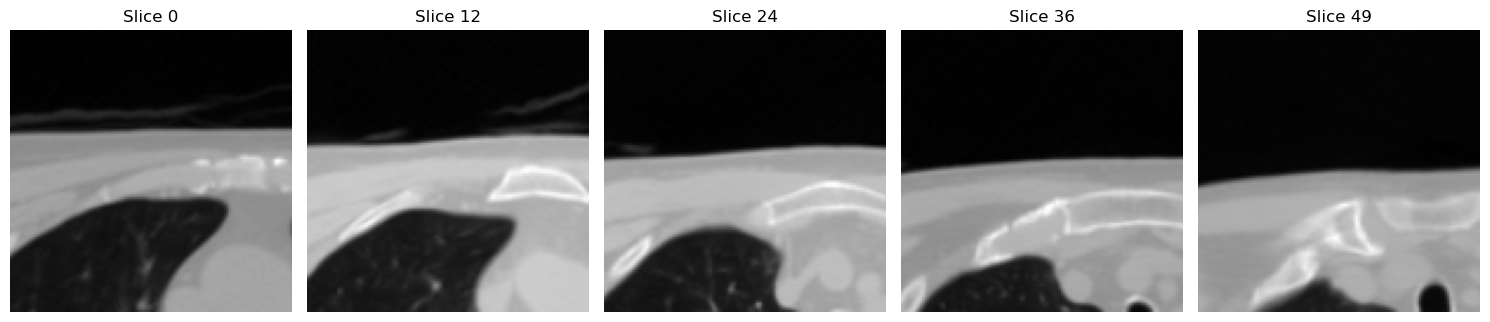

In [51]:
#Visualizing 3D Cropped Images
#Since a 3D image consists of multiple slices, we'll display a few representative slices using matplotlib.
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

def visualize_3d_image(image_path, num_slices=5):
    """
    Visualize multiple slices from a 3D cropped image.
    
    Parameters:
    - image_path: Path to the 3D NIfTI or NRRD image
    - num_slices: Number of slices to display across the volume
    """
    image = sitk.ReadImage(image_path)
    img_array = sitk.GetArrayFromImage(image)  # Convert to numpy array

    total_slices = img_array.shape[0]  # Number of slices in Z-direction
    slice_indices = np.linspace(0, total_slices - 1, num_slices, dtype=int)  # Select slices evenly spaced

    fig, axes = plt.subplots(1, num_slices, figsize=(15, 5))
    
    for i, slice_idx in enumerate(slice_indices):
        axes[i].imshow(img_array[slice_idx], cmap="gray")
        axes[i].set_title(f"Slice {slice_idx}")
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
cropped_image_path = "C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/Processed_images/HN_CHUS_001_cropped.nrrd"  # Replace with your actual file
visualize_3d_image(cropped_image_path)

#This code selects num_slices (default: 5) slices from the 3D volume and displays them.

In [43]:
#Generate Slices for 2D Models
#For 2D model training, we need to extract individual slices as PNG images.
import numpy as np
import cv2

slice_output_dir = "Processed_2D_Slices"
os.makedirs(slice_output_dir, exist_ok=True)

for file in os.listdir(output_dir):
    if "cropped" in file and file.endswith(".nrrd"):
        img_path = os.path.join(output_dir, file)
        img = sitk.ReadImage(img_path)
        img_array = sitk.GetArrayFromImage(img)

        patient_id = file.split(".")[0]
        patient_folder = os.path.join(slice_output_dir, patient_id)
        os.makedirs(patient_folder, exist_ok=True)

        for i, slice_img in enumerate(img_array):
            slice_img = (slice_img - np.min(slice_img)) / (np.max(slice_img) - np.min(slice_img)) * 255  # Normalize
            slice_img = slice_img.astype(np.uint8)
            
            slice_filename = os.path.join(patient_folder, f"slice_{i:03d}.png")
            cv2.imwrite(slice_filename, slice_img)
        
        print(f"Saved {len(img_array)} slices for {file} in {patient_folder}")


Saved 50 slices for HN_CHUS_001_cropped.nrrd in Processed_2D_Slices\HN_CHUS_001_cropped
Saved 50 slices for HN_CHUS_002_cropped.nrrd in Processed_2D_Slices\HN_CHUS_002_cropped
Saved 50 slices for HN_CHUS_011_cropped.nrrd in Processed_2D_Slices\HN_CHUS_011_cropped
Saved 50 slices for HN_CHUS_012_cropped.nrrd in Processed_2D_Slices\HN_CHUS_012_cropped
Saved 50 slices for HN_CHUS_017_cropped.nrrd in Processed_2D_Slices\HN_CHUS_017_cropped
Saved 50 slices for HN_CHUS_018_cropped.nrrd in Processed_2D_Slices\HN_CHUS_018_cropped
Saved 50 slices for HN_CHUS_023_cropped.nrrd in Processed_2D_Slices\HN_CHUS_023_cropped
Saved 50 slices for HN_CHUS_024_cropped.nrrd in Processed_2D_Slices\HN_CHUS_024_cropped
Saved 50 slices for HN_CHUS_029_cropped.nrrd in Processed_2D_Slices\HN_CHUS_029_cropped
Saved 50 slices for HN_CHUS_032_cropped.nrrd in Processed_2D_Slices\HN_CHUS_032_cropped
Saved 50 slices for HN_CHUS_034_cropped.nrrd in Processed_2D_Slices\HN_CHUS_034_cropped
Saved 50 slices for HN_CHUS_037_

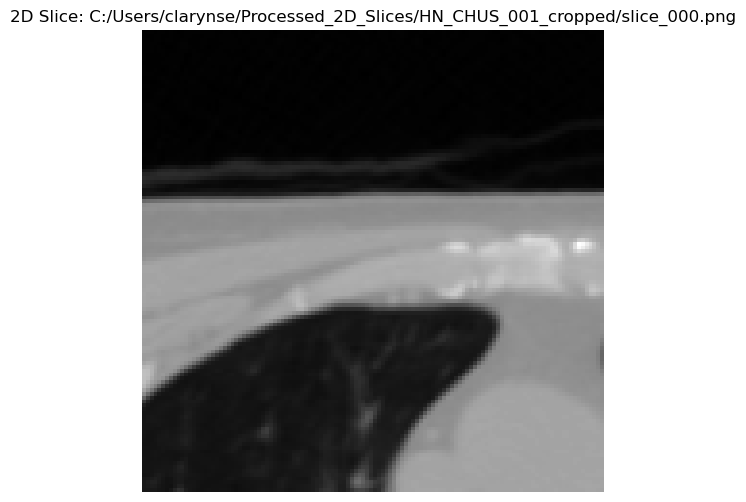

In [55]:
#Visualizing 2D Slices (For 2D Models)
import cv2

def visualize_2d_slice(slice_path):
    """
    Visualizes a single 2D CT slice.
    
    Parameters:
    - slice_path: Path to a single slice image (PNG format)
    """
    img = cv2.imread(slice_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap="gray")
    plt.title(f"2D Slice: {slice_path}")
    plt.axis("off")
    plt.show()

# Example usage
slice_path = "C:/Users/clarynse/Processed_2D_Slices/HN_CHUS_001_cropped/slice_000.png"  # Replace with actual slice path
visualize_2d_slice(slice_path)


In [ ]:
import SimpleITK as sitk
import os
import numpy as np
from PIL import Image

# Function to save 2D slices from a 3D image (cropped or not)
def save_2d_slices(image, mask=None, output_dir="C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/resampled_1mm_cropped_2D_slices"):
    # Get the size of the image (height, width, depth)
    size = image.GetSize()

    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterate through the slices along the z-axis (depth)
    for z in range(size[2]):  # Size[2] is the depth dimension
        # Extract the 2D slice from the 3D image
        slice_image = image[:,:,z]

        # Convert to numpy array for saving as image
        slice_array = sitk.GetArrayFromImage(slice_image)

        # Save the image
        image_filename = os.path.join(output_dir, f"{prefix}_image_{z:03d}.png")
        Image.fromarray(slice_array).save(image_filename)

        # If there's a mask, extract the corresponding 2D slice from the mask
        if mask is not None:
            slice_mask = mask[:,:,z]
            mask_filename = os.path.join(output_dir, f"{prefix}_mask_{z:03d}.png")
            Image.fromarray(slice_mask).save(mask_filename)

        print(f"Saved slice {z+1} of {prefix} to {image_filename}")
        if mask is not None:
            print(f"Saved mask for slice {z+1} of {prefix} to {mask_filename}")

# Function to process all images in a directory
def process_all_images(input_dir, output_dir="C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/resampled_1mm_cropped_2D_slices"):
    # Loop through all files in the input directory
    for file_name in os.listdir(input_dir):
        file_path = os.path.join(input_dir, file_name)
        
        # Process only .nii.gz files
        if file_name.endswith(".nii.gz"):
            print(f"Processing image: {file_name}")

            # Load the 3D image
            print(f"Loading image from {file_path}")  # Debugging line
            image = sitk.ReadImage(file_path)

            # Use the file name (without extension) as the prefix
            global prefix
            prefix = os.path.splitext(file_name)[0]  # Set prefix based on the file name (without extension)

            # Optional: If you have a corresponding mask, you can load it here (assuming mask file exists)
            mask = None
            # You can add logic for mask if needed, e.g.:
            # mask_file = file_name.replace(".nii.gz", "_mask.nii.gz")
            # mask_path = os.path.join(input_dir, mask_file)
            # if os.path.exists(mask_path):
            #     mask = sitk.ReadImage(mask_path)
            
            # Save 2D slices for this 3D volume
            save_2d_slices(image, mask=mask, output_dir=output_dir)

# Example usage:
input_dir = "C:/Users/clarynse/cropped_1mm"  # Directory containing your .nii.gz files
output_dir = "C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/resampled_1mm_cropped_2D_slices"  # Output directory for 2D slices

# Ensure input directory exists
if not os.path.exists(input_dir):
    print(f"Input directory {input_dir} does not exist.")
else:
    process_all_images(input_dir, output_dir)

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

def display_multiple_slices(input_dir, prefix, num_slices=10):
    fig, axes = plt.subplots(1, num_slices, figsize=(20, 10))  # Adjust the size as needed
    
    for i in range(num_slices):
        image_filename = os.path.join(input_dir, f"{prefix}_image_{i:03d}.png")
        
        if os.path.exists(image_filename):
            img = Image.open(image_filename)
            axes[i].imshow(img, cmap='gray')
            axes[i].axis('off')  # Hide axes
            axes[i].set_title(f"Slice {i+1}")
    
    plt.tight_layout()
    plt.show()

# Example usage:
input_dir = "C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/resampled_1mm_cropped_2D_slices"
prefix = "your_image_prefix"  # Use the image prefix you used for naming the slices
display_multiple_slices(input_dir, prefix, num_slices=10)  # Display first 10 slices


In [ ]:
#Visualizing 2D Slices (For 2D Models)
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import os
from PIL import Image

# Function to display a specific slice from a given image
def show_slice(slice_index, input_dir, all_slices, num_slices_per_image):
    # Calculate which image and slice to display
    image_filename = all_slices[slice_index]
    
    if os.path.exists(image_filename):
        img = Image.open(image_filename)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.show()

# Function to create the interactive viewer for all images in the folder
def interactive_slice_viewer(input_dir, num_slices_per_image=10):
    # Get all image files (assumes filenames are in format 'prefix_image_z.png')
    all_slices = [os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.png')]
    
    # Sort slices if needed (based on the filename or z-index)
    all_slices.sort()  # Make sure the slices are in the correct order
    
    # Create the interactive viewer
    interact(show_slice, 
             slice_index=(0, len(all_slices) - 1),
             input_dir=fixed(input_dir), 
             all_slices=fixed(all_slices), 
             num_slices_per_image=fixed(num_slices_per_image))

# Example usage:
input_dir = "C:/Users/clarynse/HN_CHUS_Laryngeal_Cancer/resampled_1mm_cropped_2D_slices"
interactive_slice_viewer(input_dir, num_slices_per_image=10)



In [ ]:
!pip install ipywidgets --upgrade